<a href="https://colab.research.google.com/github/VanshKodarlikar/Real-Time-Sentiment-Analysis-Dashboard/blob/main/Real_Time_Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df = pd.read_csv("sample_twitter_sentiment_data.csv")
df.head()

,tweet_id,created_at,keyword,text,sentiment
0,TWEET1,2024-01-12 03:29:00,AI,People are discussing AI a lot lately.,Neutral
1,TWEET2,2024-01-25 19:41:00,Deep Learning,I absolutely love working with Deep Learning!,Positive
2,TWEET3,2024-01-02 08:32:00,ChatGPT,I absolutely love working with ChatGPT!,Positive
3,TWEET4,2024-01-26 13:01:00,Machine Learning,I absolutely love working with Machine Learning!,Positive
4,TWEET5,2024-01-11 00:46:00,Deep Learning,Super impressed with the latest in Deep Learning!,Positive


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df['vader_compound'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['vader_sentiment'] = df['vader_compound'].apply(classify_sentiment)

/tmp/ipython-input-31-3395622651.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment', data=df, palette='Set2')


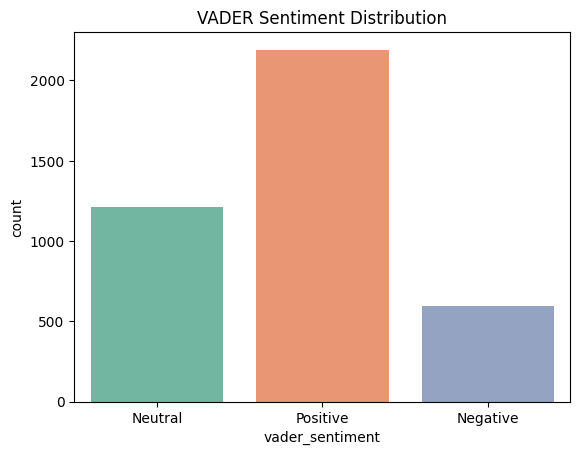

In [ ]:
sns.countplot(x='vader_sentiment', data=df, palette='Set2')
plt.title("VADER Sentiment Distribution")
plt.show()

In [ ]:
comparison = pd.crosstab(df['sentiment'], df['vader_sentiment'], rownames=['True'], colnames=['Predicted'])
print(comparison)

Predicted  Negative  Neutral  Positive
True                                  
Negative        594        0       186
Neutral           0     1214       421
Positive          0        0      1585


In [ ]:
accuracy = (df['sentiment'] == df['vader_sentiment']).mean()
print(f"VADER Sentiment Accuracy: {accuracy:.2%}")

VADER Sentiment Accuracy: 84.82%


In [ ]:
from wordcloud import WordCloud

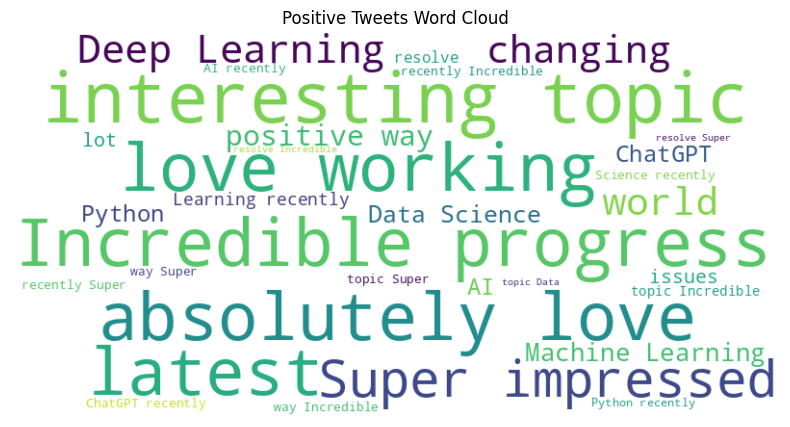

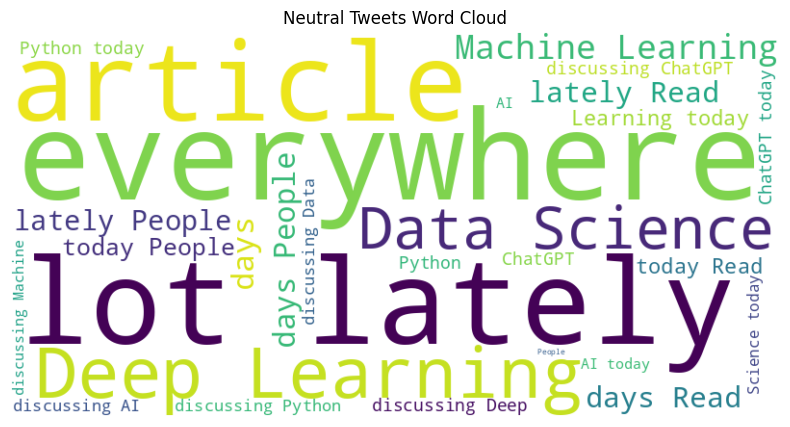

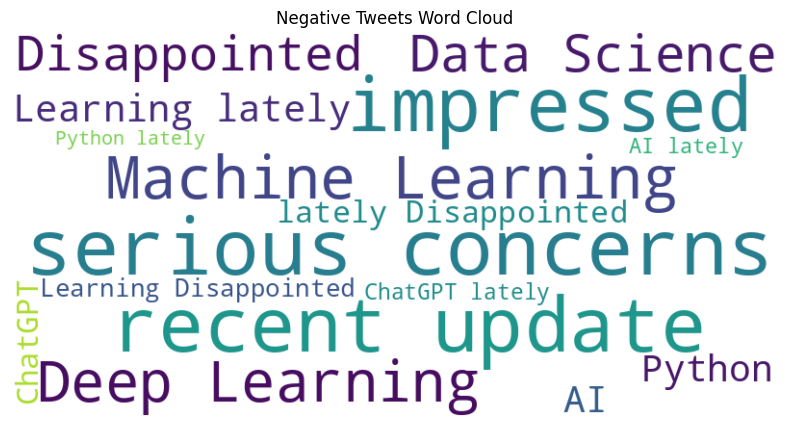

In [ ]:
for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = " ".join(df[df['vader_sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment} Tweets Word Cloud")
    plt.show()
